# Медианный фильтр

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

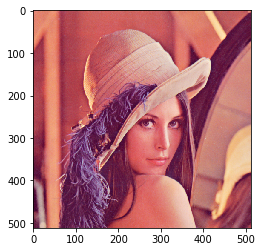

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
def median_filter(img, ksize):
    result = np.zeros_like(img)
    mask = np.uint8(np.zeros((img.shape[0] + ksize,
                              img.shape[1] + ksize,
                              img.shape[2])) + np.mean(np.mean(img, axis=0),axis=0))
    mask[ksize//2 : img.shape[0] + ksize//2,
         ksize//2 : img.shape[1] + ksize//2,:] = img[:,:,:]
    for channel in range(img.shape[2]):
        for col in range(img.shape[1]):
            for row in range(img.shape[0]):
                result[row,col,channel] = np.uint8(np.median(mask[row:row+ksize,
                                                                  col:col+ksize,
                                                                  channel]))
    return result

## Добавляем случайный шум на изображение

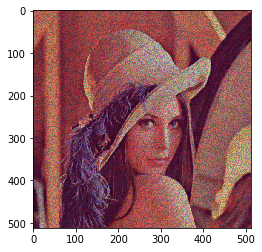

In [5]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [6]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), Output()), _dom_classes=('widget-interact',))